# Source Code:

In [1]:
import numpy as np

# Define the dataset
X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)
y = np.array([[92], [86], [89]], dtype=float)

# Normalize the input features
X = X / np.amax(X, axis=0)  # Maximum of X array longitudinally (normalize)
y = y / 100  # Normalize the output values to the range [0, 1]

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# Variable initialization
epoch = 7000  # Number of training iterations
lr = 0.1  # Learning rate
inputlayer_neurons = 2  # Number of features in the dataset
hiddenlayer_neurons = 3  # Number of neurons in the hidden layer
output_neurons = 1  # Number of neurons in the output layer

# Weight and bias initialization (random values)
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

# Training the neural network
for i in range(epoch):
    # Forward Propagation
    hinp1 = np.dot(X, wh)  # Input to hidden layer
    hinp = hinp1 + bh  # Adding bias to hidden layer input
    hlayer_act = sigmoid(hinp)  # Activation of hidden layer

    outinp1 = np.dot(hlayer_act, wout)  # Input to output layer
    outinp = outinp1 + bout  # Adding bias to output layer input
    output = sigmoid(outinp)  # Activation of output layer

    # Backpropagation
    EO = y - output  # Error in output
    outgrad = derivatives_sigmoid(output)  # Gradient of output layer
    d_output = EO * outgrad  # Error contribution from output layer

    EH = d_output.dot(wout.T)  # Error propagated back to the hidden layer
    hiddengrad = derivatives_sigmoid(hlayer_act)  # Gradient of hidden layer
    d_hiddenlayer = EH * hiddengrad  # Error contribution from hidden layer

    # Update the weights and biases
    wout += hlayer_act.T.dot(d_output) * lr  # Update output weights
    bout += np.sum(d_output, axis=0, keepdims=True) * lr  # Update output bias
    wh += X.T.dot(d_hiddenlayer) * lr  # Update hidden weights
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr  # Update hidden bias

# Print the results
print("Input: \n", X)
print("Actual Output: \n", y)
print("Predicted Output: \n", output)

Input: 
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89529755]
 [0.88377943]
 [0.89001527]]


$$
Visualization's
$$

Student Performance Prediction - First Prediction Output: [0.94179523]
House Price Prediction - First Prediction Output: [0.56722869]
Customer Churn Prediction - First Prediction Output: [0.65018823]
Weather Prediction - First Prediction Output: [0.80435563]
Heart Disease Prediction - First Prediction Output: [0.07295556]


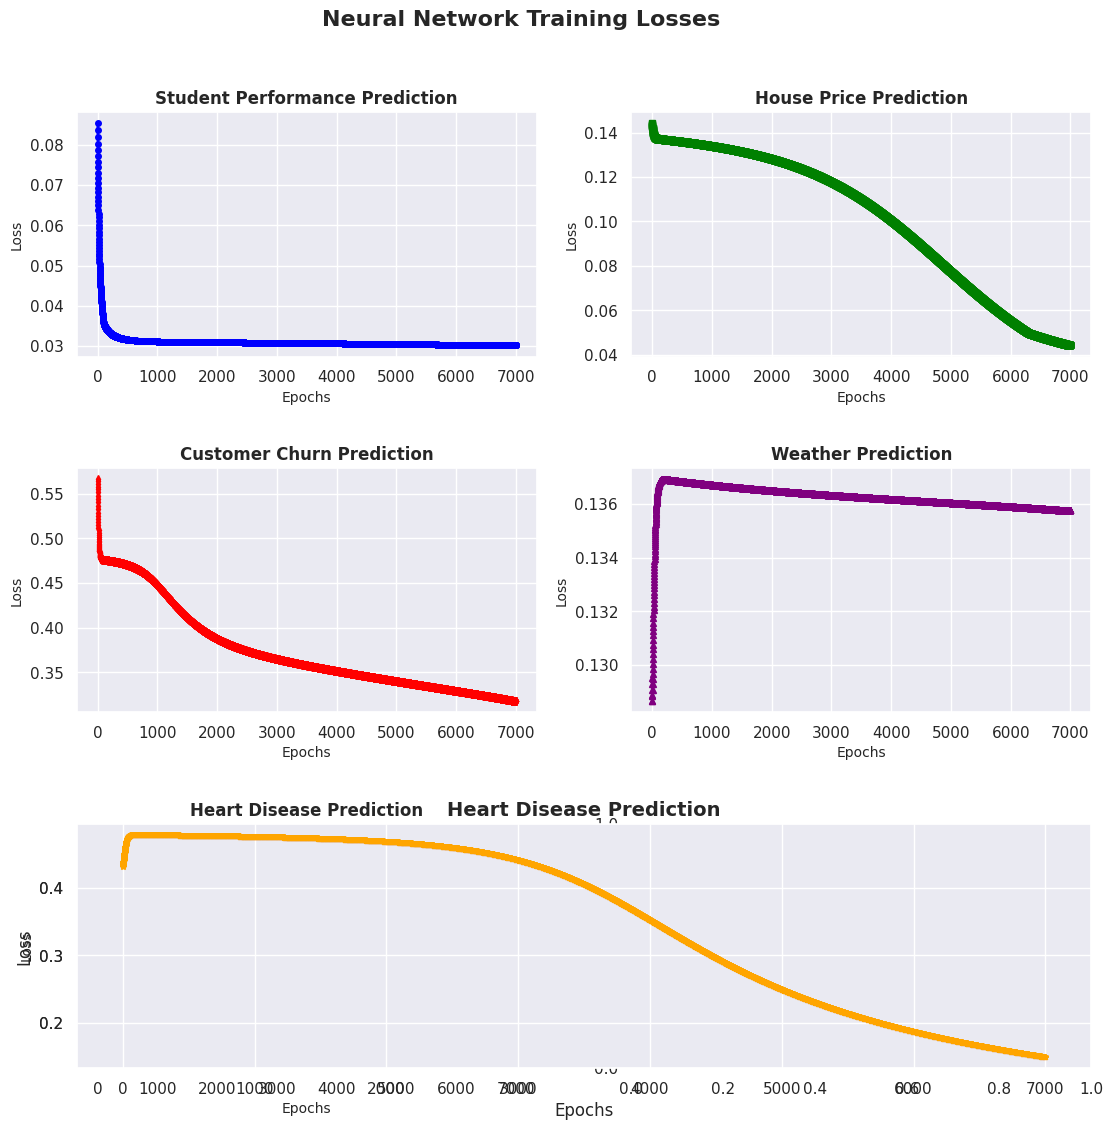

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean and professional style
sns.set(style="darkgrid")
plt.rcParams["font.family"] = "DejaVu Sans"

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def derivatives_sigmoid(x):
    return x * (1 - x)

# Function to train a neural network
def train_neural_network(X, y, input_neurons, hidden_neurons, output_neurons, epochs=7000, lr=0.1):
    X = X / np.amax(X, axis=0)
    y = y / np.amax(y)
    
    wh = np.random.uniform(size=(input_neurons, hidden_neurons))
    bh = np.random.uniform(size=(1, hidden_neurons))
    wout = np.random.uniform(size=(hidden_neurons, output_neurons))
    bout = np.random.uniform(size=(1, output_neurons))
    
    losses = []
    
    for _ in range(epochs):
        # Forward propagation
        hinp = np.dot(X, wh) + bh
        hlayer_act = sigmoid(hinp)
        outinp = np.dot(hlayer_act, wout) + bout
        output = sigmoid(outinp)
        
        # Backpropagation
        EO = y - output
        outgrad = derivatives_sigmoid(output)
        d_output = EO * outgrad
        EH = d_output.dot(wout.T)
        hiddengrad = derivatives_sigmoid(hlayer_act)
        d_hiddenlayer = EH * hiddengrad
        
        # Weight and bias updates
        wout += hlayer_act.T.dot(d_output) * lr
        bout += np.sum(d_output, axis=0, keepdims=True) * lr
        wh += X.T.dot(d_hiddenlayer) * lr
        bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr
        
        loss = np.mean(np.abs(EO))
        losses.append(loss)
    
    return output, losses

# Function to plot all losses in subplots
def plot_subplots(losses_list, titles, colors, markers):
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3x2 grid
    
    for i, ax in enumerate(axes.flat[:-1]):  # First 4 plots
        ax.plot(losses_list[i], color=colors[i], marker=markers[i], markersize=4, linestyle="-", linewidth=1.5)
        ax.set_title(titles[i], fontsize=12, fontweight="bold")
        ax.set_xlabel("Epochs", fontsize=10)
        ax.set_ylabel("Loss", fontsize=10)
        ax.grid(True)

    # Last plot takes full width
    ax_last = fig.add_subplot(3, 1, 3)  # Last plot full width
    ax_last.plot(losses_list[-1], color=colors[-1], marker=markers[-1], markersize=4, linestyle="-", linewidth=1.5)
    ax_last.set_title(titles[-1], fontsize=14, fontweight="bold")
    ax_last.set_xlabel("Epochs", fontsize=12)
    ax_last.set_ylabel("Loss", fontsize=12)
    ax_last.grid(True)

    fig.suptitle("Neural Network Training Losses", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save plot as image
    plt.savefig("neural_network_loss_plot.png", dpi=300)
    plt.show()

# Define datasets
datasets = [
    (np.array([[2, 9], [1, 5], [3, 6], [4, 8], [5, 10]], dtype=float), np.array([[92], [86], [89], [94], [97]], dtype=float)),
    (np.array([[1500, 3], [1800, 4], [2200, 3], [2700, 5], [3200, 4]], dtype=float), np.array([[250], [310], [280], [450], [375]], dtype=float)),
    (np.array([[25, 2000], [32, 5000], [45, 12000], [29, 3000], [40, 10000]], dtype=float), np.array([[0], [1], [0], [1], [0]], dtype=float)),
    (np.array([[6, 85], [12, 65], [15, 60], [18, 70], [21, 80]], dtype=float), np.array([[20], [30], [33], [28], [22]], dtype=float)),
    (np.array([[45, 120], [55, 140], [60, 135], [50, 130], [65, 150]], dtype=float), np.array([[0], [1], [1], [0], [1]], dtype=float))
]

# Titles, colors, and markers for plots
titles = [
    "Student Performance Prediction",
    "House Price Prediction",
    "Customer Churn Prediction",
    "Weather Prediction",
    "Heart Disease Prediction"
]
colors = ["blue", "green", "red", "purple", "orange"]
markers = ["o", "s", "d", "^", "*"]

# Train models and collect losses
losses_list = []
outputs = []
for X, y in datasets:
    output, losses = train_neural_network(X, y, 2, 3, 1)
    outputs.append(output[0])  # Store first prediction result
    losses_list.append(losses)

# Print first result from each dataset
for i, title in enumerate(titles):
    print(f"{title} - First Prediction Output: {outputs[i]}")

# Plot all losses in subplots and save as an image
plot_subplots(losses_list, titles, colors, markers)

✅ Image saved as: neural_network_loss_plot.png


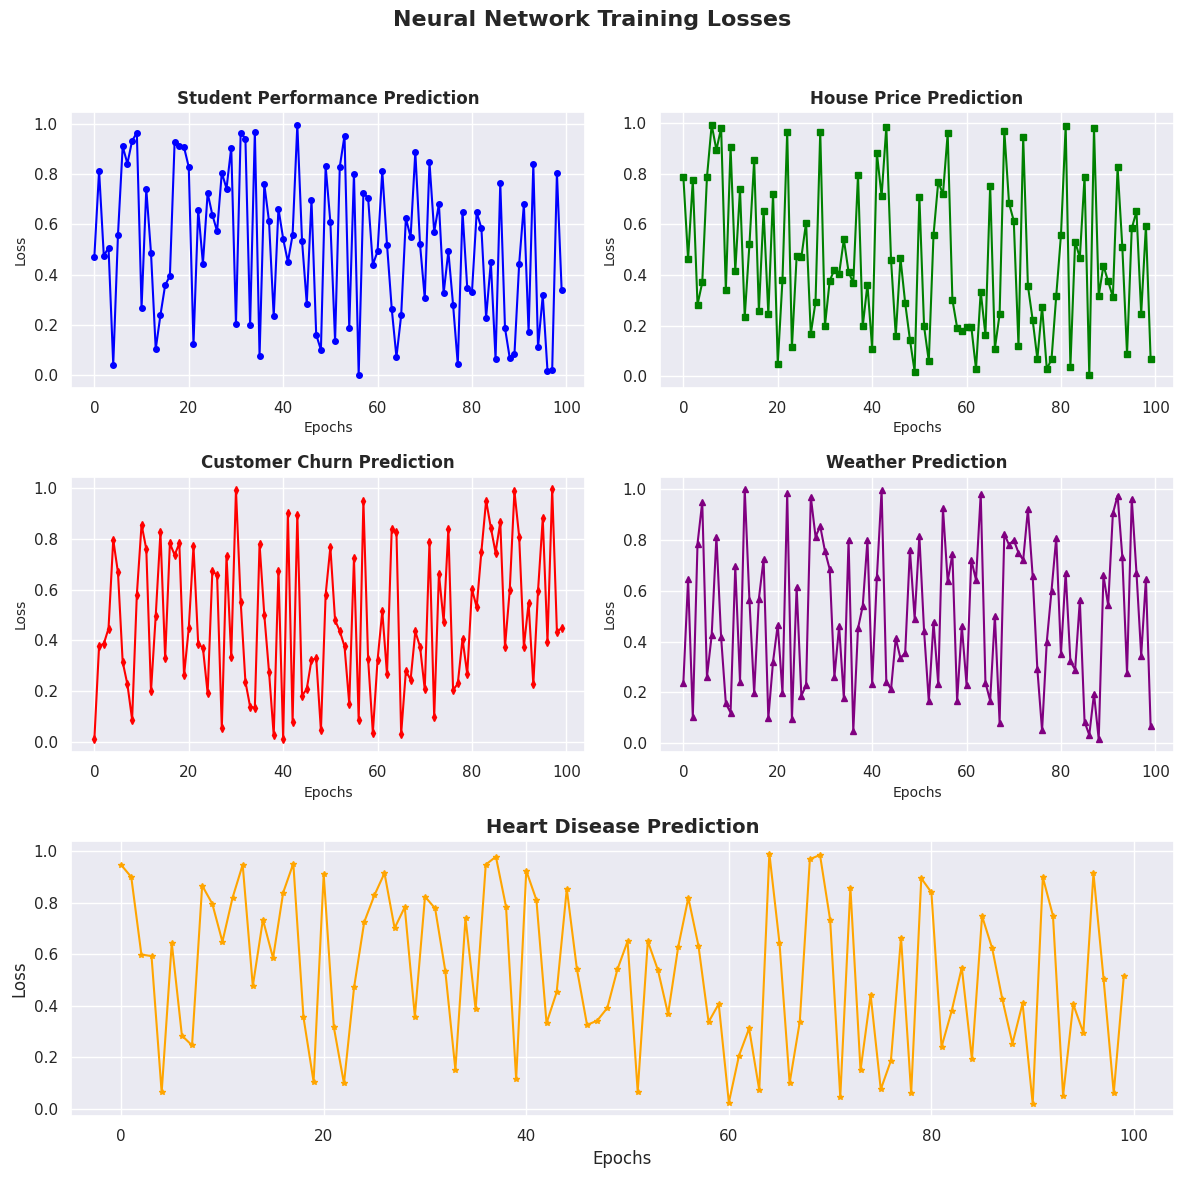

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean and professional style
sns.set(style="darkgrid")
plt.rcParams["font.family"] = "DejaVu Sans"

# Function to plot all losses in subplots and save as image
def plot_subplots(losses_list, titles, colors, markers, save_path="neural_network_loss_plot2.png"):
    fig = plt.figure(figsize=(12, 12))  # Increase figure size
    
    for i in range(4):  
        ax = fig.add_subplot(3, 2, i + 1)  # 3x2 Grid, first 4 subplots
        ax.plot(losses_list[i], color=colors[i], marker=markers[i], markersize=4, linestyle="-", linewidth=1.5)
        ax.set_title(titles[i], fontsize=12, fontweight="bold")
        ax.set_xlabel("Epochs", fontsize=10)
        ax.set_ylabel("Loss", fontsize=10)
        ax.grid(True)
    
    # Last plot takes full width
    ax_last = fig.add_subplot(3, 1, 3)  # Last plot takes full width
    ax_last.plot(losses_list[4], color=colors[4], marker=markers[4], markersize=4, linestyle="-", linewidth=1.5)
    ax_last.set_title(titles[4], fontsize=14, fontweight="bold")
    ax_last.set_xlabel("Epochs", fontsize=12)
    ax_last.set_ylabel("Loss", fontsize=12)
    ax_last.grid(True)

    fig.suptitle("Neural Network Training Losses", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # **Save the figure as an image**
    plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Image will be saved
    print(f"✅ Image saved as: {save_path}")  # Confirmation message

    plt.show()  # Display the plot

# Example losses list
losses_list = [np.random.rand(100) for _ in range(5)]  # Random data for testing
titles = ["Student Performance Prediction", "House Price Prediction", "Customer Churn Prediction", "Weather Prediction", "Heart Disease Prediction"]
colors = ["blue", "green", "red", "purple", "orange"]
markers = ["o", "s", "d", "^", "*"]

# **Call the function and save the image**
plot_subplots(losses_list, titles, colors, markers, save_path="neural_network_loss_plot.png")

# The End